In [18]:
##THE FIRST RUN IS LONGER BECAUSE OF LOADING OF SCIPY

%matplotlib notebook
#%matplotlib inline

#https://stackoverflow.com/questions/20961287/what-is-pylab
#%pylab
##import matplotlib.pylab as p13 
##import pylab as p14
##from matplotlib.pylab import *
from pylab import *
import numpy as np


#parameters are described at  https://github.com/martin12333/PyMartinCA/blob/master/PARAMETERS.txt

r=2

bmin=7
smin=7

xlo=7; dx52=6;  ylo=9; dy52=3

#

xhi=xlo+dx52
yhi=ylo + dy52

#=============================

w=1000 #1850 #2000 #2250 #1800
h=1000 #950 #1300 #1400 #950

#
####################
##np.random.seed()      

p=0.5 #0.25 #0.16
a = (rand( h, w )<p) 

#=============================

###x11 = floor(linspace(xlo, xhi + 0.999, w))
###y11 = floor(linspace(yhi + 0.999 , ylo, h))
x11 = (linspace(xlo, xhi , w))
y11 = (linspace(yhi  , ylo, h))
xx, yy = meshgrid(x11, y11)
 
bmax=xx
smax=yy

#

niter =  200 #400 #200 #1000 #3000   
sleep1=    0 #0.3      #0.1 #0 #0.01
step1=12 #4 #20 #8 #15 #5 #1 #37 #2
step2=60 #120 #1

bfade = False#True  # False
q = 0.1#0.9 #0.8#0.7 #0.3 #0.1 
###qqq=0.2 ###0 #0.5 #1#2 #4 #8 #1.8
#q2=0.7
#

afade = 0.1 * a
averyold = a 

diam = 2*r + 1


0 0.500 0.000
60 0.500 0.000
120 0.500 0.000
180 0.500 0.000


<IPython.core.display.Javascript object>


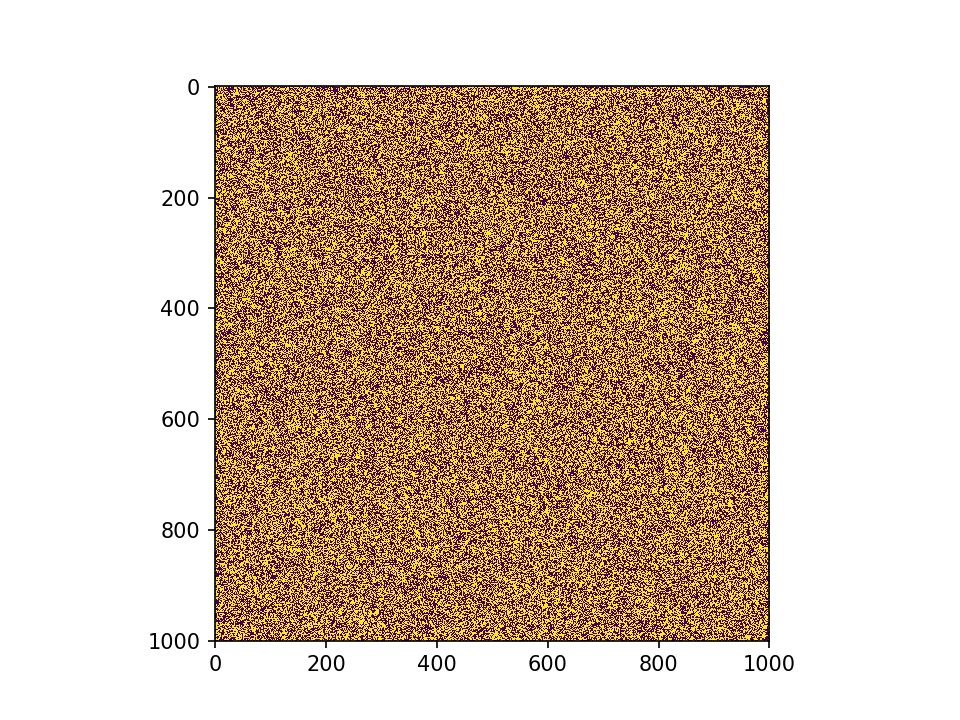

CPU times: user 2.01 s, sys: 4.02 ms, total: 2.02 s
Wall time: 10.3 s


In [20]:
%%time

import scipy.ndimage 

from scipy.ndimage import filters

import time

import matplotlib.pyplot as plt


#plt.ion()


#img_plot = plt.imshow(a)


#plt.show(block=False)



kr=np.ones((diam,diam), dtype=np.uint8)



OR = logical_or
AND = logical_and

for i in range(niter):

    ################
    
    ####n=scipy.ndimage.convolve(a,kr)
    #n=scipy.ndimage.convolve(0+a,kr)

    ###################
    
    #n41 =   diam*diam*filters.uniform_filter(0.0+a,diam )   ##,mode='wrap')  )  
    #n=n41.round()   
    
    #################

    n=smin*(0+a)
    
    #################
    
    birth = AND(  n>=bmin,  AND( n<=bmax, logical_not(a) )  )
    survi = AND(  n>=smin,  AND( n<=smax, a )  )
    a =  OR( birth , survi )  
    if (i % step1)==0:

        
        ###########################################
        
        
        if bfade:
            ###asho = np.maximum( a , qqq*afade )
            ##asho = np.maximum( 1 , q2*afade/q )
            #asho = np.minimum( 1 , q2*afade/q )
            asho = np.minimum( 1 , afade/q )
            afade = q*a + (1-q)*afade
            ####asho=afade
        else:
            asho=0+a
            

        ###########################################

            
        ada51= logical_xor(a, averyold)  
        averyold =a 
        
        #adaimage = transpose( ( ( asho)))
        #b = array(255*clip(adaimage,0,1),'B')

        #img_plot.set_data(asho)
        ###imshow(asho)
        ##show()
        #plt.draw()


        #time.sleep(sleep1)

        if (i % step2)==0:
            am51=(0.0+a).mean()
            sam51='{:.3f}'.format(am51)
            dam51=ada51.mean()
            sdam51='{:.3f}'.format(dam51)
            print( i, sam51, sdam51)

###########################################

            
#plt.figure(figsize = (11,5.5))
 
img_plot = plt.imshow(asho)


In [10]:
a.dtype

dtype('bool')

In [11]:
n

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [13]:
np.array(n,dtype=np.uint8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
*int*?

In [ ]:
int*?

In [ ]:
%config

In [ ]:
%config InlineBackend.rc

In [ ]:
%config InlineBackend

In [ ]:
%config DisplayFormatter